READ documentation for ucimlrepo

Dataset explanation from documentation

This is a multivariate dataset with a mix of categorical and numerical variables. There are 14 features and 1 target variable.
The prediction task is to determine whether a given person has an income over $50,000 per year using classification models.

There are missing values in the dataset which we will need to deal with accordingly.

Before performing exploratory data analysis we will give formal descriptions of the variables.

'age': the age of the person
'workclass': the work class of the person
'fnlwgt': final weight
'education': the education of the person
'education-num':
'marital-status':
'occupation':
'relationship':
'race':
'sex':
'capital-gain':
'capital-loss':
'hours-per-week':
'native-country':
'income':

In [17]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
#print(adult.metadata)

In [57]:
# variable information 
print(adult.variables) 

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [58]:
# combine features and target into a single dataframe
# this makes it easier to perform EDA
adult_df = pd.concat([X, y], axis=1)

# display the first few rows of the combined dataframe
print(adult_df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

We must clean the income column since there currently are '=50K', '>50K', '<=50K.' and '>50K.' values. We must ensure that there are 2 possible classes by removing the '.' from the column and any spaces too. 

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


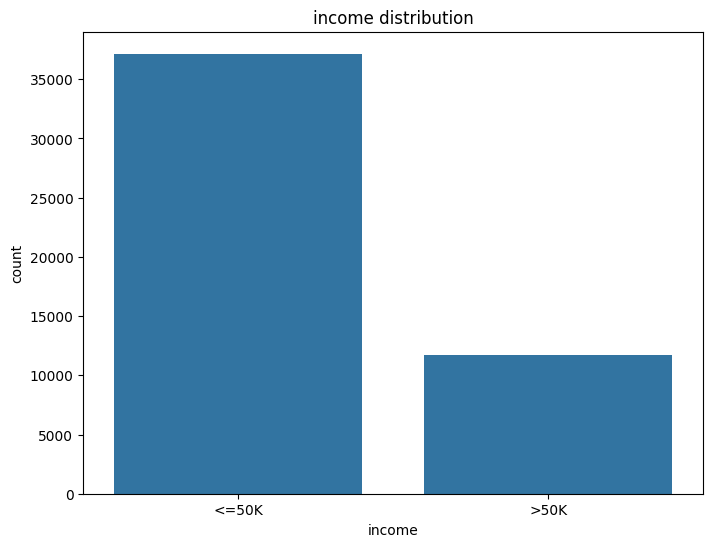

In [59]:
# clean the 'income' column by removing any trailing periods or spaces
adult_df['income'] = adult_df['income'].str.strip('.').str.strip()

# confirm that the income column now has only two unique values
print(adult_df['income'].value_counts())

# check the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=adult_df)
plt.title('income distribution')
plt.show()

Clearly, there are significantly more people (more than 3 times) with <=50K than >50K.

In [60]:
# get basic information about the dataset
print(adult_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [61]:
# check for missing values
print(adult_df.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


There are some missing values we will have to deal with from the 'workclass', 'occupation' and 'native-country' variables. We must investigate methods of dealing with this, since these variables will likely have a large impact on income.

In [62]:
# describe the numeric columns
print(adult_df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


Age ranges from 17 to 90 but average is around 38 years old. ...

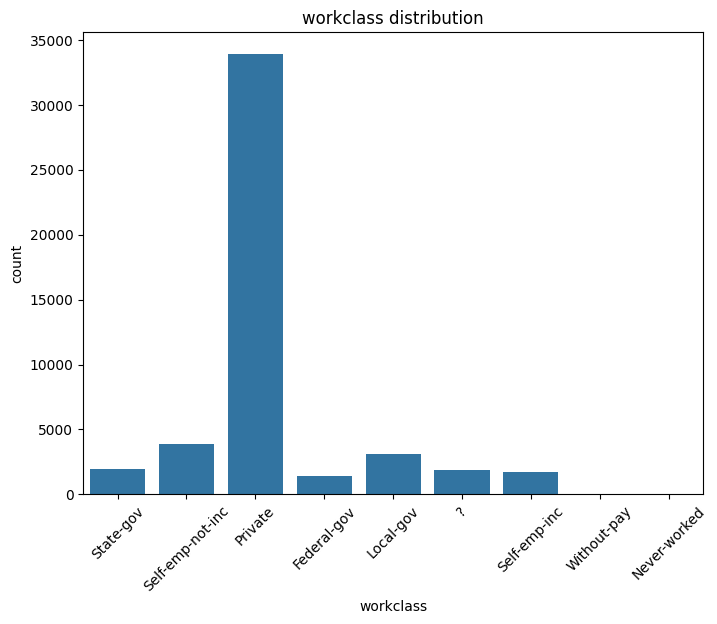

In [63]:
# check the distribution of categorical features
plt.figure(figsize=(8, 6))
sns.countplot(x='workclass', data=adult_df)
plt.title('workclass distribution')
plt.xticks(rotation=45)
plt.show()

'Private' workclass seems to be the most frequent. The 'workclass' variable may therefore be less helpful than others since the data is heavily skewed towards 'Private' compared to other values.

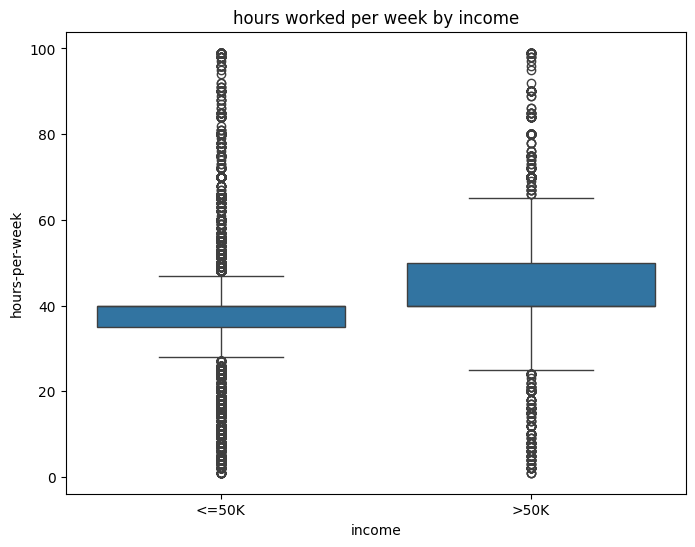

In [64]:
# check the relationship between hours worked and income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='hours-per-week', data=adult_df)
plt.title('hours worked per week by income')
plt.show()

The boxplots show a fairly balanced distributions of hours-per-week for both income classes.

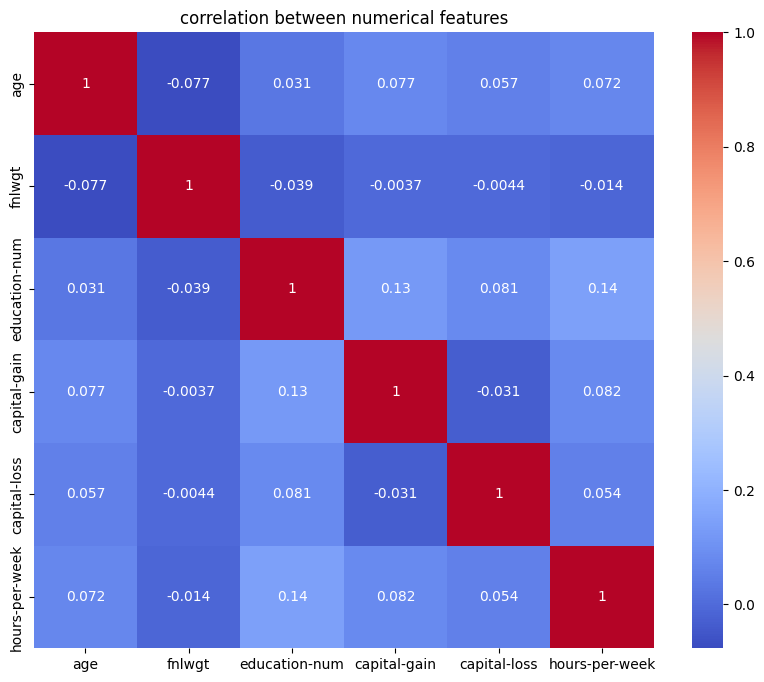

In [53]:
# check the correlation between numeric features
# select only the numeric columns from the dataframe
numeric_columns = adult_df.select_dtypes(include=['int64', 'float64'])

# create a heatmap to show correlations between numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('correlation between numerical features')
plt.show()

There are very low correlations between the numerical variables.

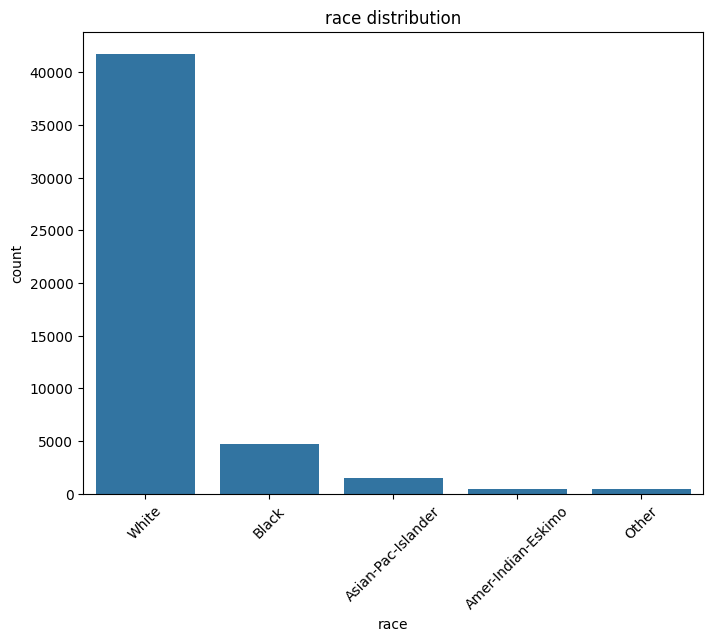

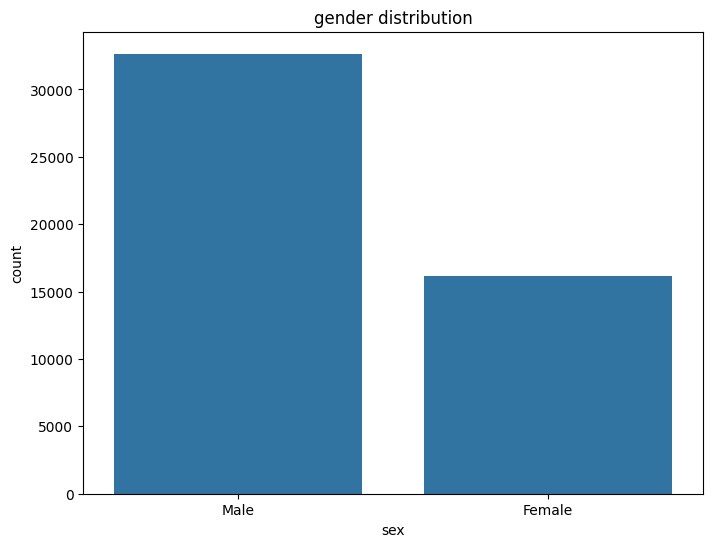

In [54]:
# check the distribution of race and gender in the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='race', data=adult_df)
plt.title('race distribution')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=adult_df)
plt.title('gender distribution')
plt.show()

The dataset has predominantely 'White' for race so the data is very imbalanced for this variable. The gender distribution shows that there are around twcie the amount of males as there are females.

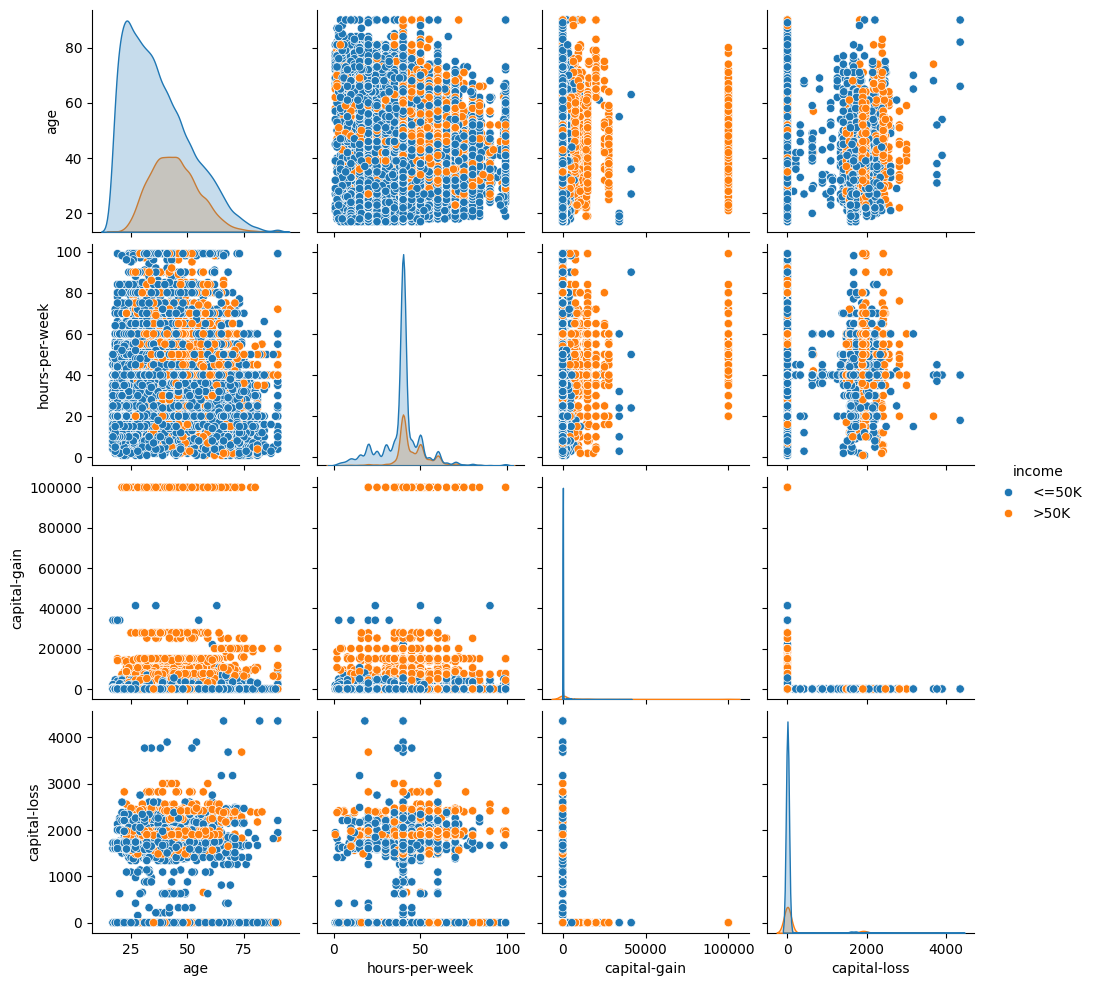

In [55]:
# pairplot to show pairwise relationships between variables, colored by income
sns.pairplot(adult_df, hue='income', vars=['age', 'hours-per-week', 'capital-gain', 'capital-loss'])
plt.show()
